In [391]:
from manifold_learning import IMD
import numpy as np
from FastCCM import CCM
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import get_truncated_lorenz_rand,load_csv_dataset,load_traffic_dataset,load_excel_dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from manifold_learning import imd_nd_smap, imd_1d_smap, imd_nd
import importlib
importlib.reload(imd_nd_smap)
importlib.reload(imd_1d_smap)

<module 'manifold_learning.imd_1d_smap' from '/home/iaroslav/Documents/Python projects/manifold_learning/src/manifold_learning/imd_1d_smap.py'>

In [21]:
from skpp import ProjectionPursuitRegressor

In [22]:
estimator = ProjectionPursuitRegressor(r=3)
aa = estimator.fit_transform(observables[:-30,:],observables[30:,:])

: 

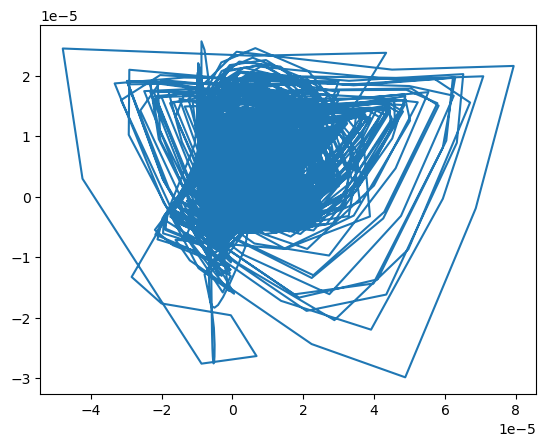

In [427]:
plt.plot(aa[:,0],aa[:,2])

In [2]:
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=3,)

X_c, Y_c = cca.fit_transform(observables[:-30], observables[30:])

NameError: name 'observables' is not defined

In [384]:
CCM.PairwiseCCM().compute(X_c[None],Y_c[None],1500,400,60,30,method="smap",theta=5,)


array([[[0.38564736]],

       [[0.26725405]],

       [[0.16401722]]], dtype=float32)

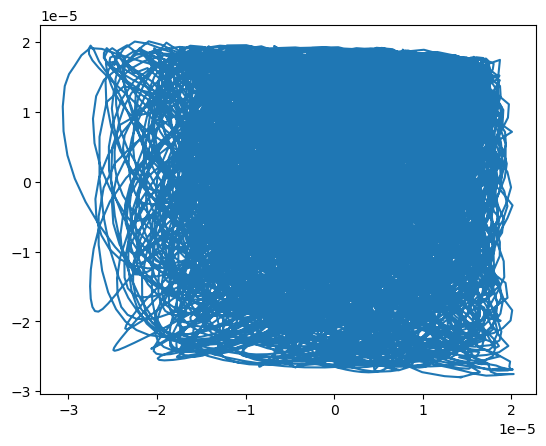

In [385]:
plt.plot(X_c[:,1],X_c[:,0])

In [122]:
trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=3, n_components=4, subtract_corr=True, device="cpu")


In [157]:
trainer = imd_1d_smap.IMD_1D_smap(observables.shape[1], embed_dim=3, embed_lag=20, n_components=4, subtract_corr=True, device="cpu")


In [123]:
W = trainer.find_iterative_solution_(observables, sample_len=200, library_len=1500, 
            exclusion_rad=90, theta=5, tp=90, 
            epochs=100, num_batches=32, tp_policy="fixed")


tensor(178.8785)
tensor(89.2491)
tensor(45.0226)
tensor(24.3582)
tensor(11.9980)
tensor(7.0916)
tensor(3.2280)
tensor(1.5433)
tensor(1.2953)
tensor(2.4491)
tensor(4.0501)
tensor(4.4713)
tensor(4.9261)
tensor(4.9097)
tensor(5.0612)
tensor(0.0386)
tensor(2.3635)
tensor(3.5669)
tensor(0.6470)
tensor(2.1339)
tensor(1.3538)
tensor(3.0503)
tensor(4.3663)
tensor(4.3001)
tensor(4.8117)
tensor(0.1110)
tensor(2.5048)
tensor(3.7816)
tensor(4.3887)
tensor(0.2712)
tensor(2.6190)
tensor(1.0694)
tensor(2.9339)


_LinAlgError: linalg.inv: (Batch element 0): The diagonal element 3 is zero, the inversion could not be completed because the input matrix is singular.

In [124]:
unmixed = observables @ W

NameError: name 'W' is not defined

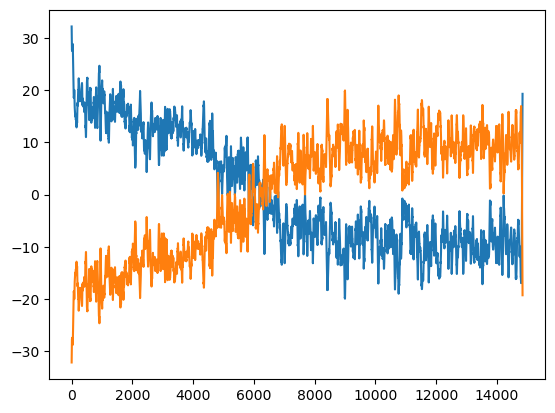

In [272]:
plt.plot(unmixed[:,:])

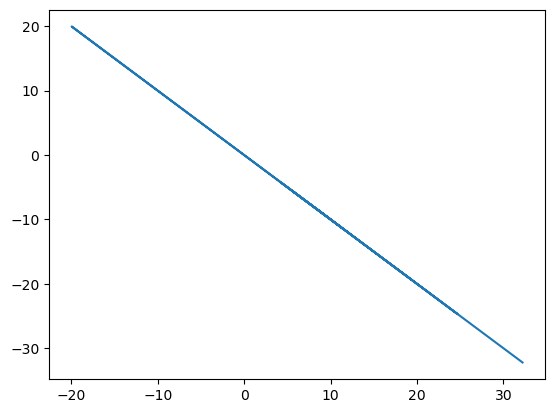

In [273]:
plt.plot(unmixed[:,0],unmixed[:,1])

In [255]:
CCM.PairwiseCCM().compute(unmixed[None],unmixed[None],1500,400,60,30,method="smap",theta=5,)


array([[[0.9509824 ]],

       [[0.95162445]]], dtype=float32)

In [2]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

In [2]:
X = get_truncated_lorenz_rand(400,n_steps=20000)

observables = StandardScaler().fit_transform(X)

In [3]:
X = load_csv_dataset("Jan1023_1_fr_ma2sec_sr30.csv").to_numpy()[:,1:]
#X = utils.get_td_embedding_np(X,5,20).reshape(-1,5*X.shape[1])

observables = StandardScaler().fit_transform(X)

In [345]:
X = load_csv_dataset("Trace_Hypo_Fish1_135658.csv").to_numpy()
pos = load_csv_dataset("spPosfiltered.csv").to_numpy()
y = X[200:,[-1]]
X =  X[200:,:-1]

observables = X
observables_min = observables.min()
observables = np.log((observables - observables_min + 1e-1))

sscaler = StandardScaler()
observables = sscaler.fit_transform(observables)
ppca = PCA(whiten=False)
observables = ppca.fit_transform(observables)

In [346]:
X_ = load_csv_dataset("Trace_Normo_Fish1_133105.csv").to_numpy()
y_ = X_[200:,[-1]]
X_ =  X_[200:,:-1]

observables_ = X_
observables_ = np.log((observables_ - observables_min + 1e-1))

observables_ = sscaler.transform(observables_)

observables_ = ppca.transform(observables_)

In [396]:
observables = np.concatenate([observables,observables_])


In [423]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),6), np.linspace(X[:,2].min(),X[:,2].max(),6))).reshape(2,-1).T

In [424]:
X_ = [get_truncated_lorenz_rand(400,n_steps=20000)[:,[0,2]] for i in range(1)]
observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=15) for e in exp_kernel_grid]) for x in X_]).T

observables = StandardScaler().fit_transform(observables)

In [6]:
observables = np.concatenate([observables, np.random.normal(0,1,(observables.shape[0],30))],axis=1)

In [397]:
trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=5, n_components=20, subtract_corr=True, device="cuda")


In [393]:
trainer = imd_1d_smap.IMD_1D_smap(observables.shape[1], embed_dim=7, embed_lag=7, n_components=1, subtract_corr=True, device="cuda")


In [414]:
trainer.fit(observables, sample_len=150, library_len=800, 
            exclusion_rad=30, theta=5, tp=60, 
            epochs=1000, num_batches=32,optimizer="Adam", learning_rate=0.1, tp_policy="range",loss_mask_size=5)


Epoch 1/1000, Loss: 0.5271
Epoch 2/1000, Loss: 0.5198
Epoch 3/1000, Loss: 0.5198
Epoch 4/1000, Loss: 0.5127
Epoch 5/1000, Loss: 0.5253
Epoch 6/1000, Loss: 0.5229
Epoch 7/1000, Loss: 0.5300
Epoch 8/1000, Loss: 0.5012
Epoch 9/1000, Loss: 0.5088
Epoch 10/1000, Loss: 0.5127
Epoch 11/1000, Loss: 0.5098
Epoch 12/1000, Loss: 0.5283
Epoch 13/1000, Loss: 0.5227
Epoch 14/1000, Loss: 0.5123
Epoch 15/1000, Loss: 0.5121
Epoch 16/1000, Loss: 0.5109
Epoch 17/1000, Loss: 0.5115
Epoch 18/1000, Loss: 0.5124
Epoch 19/1000, Loss: 0.5112
Epoch 20/1000, Loss: 0.5103
Epoch 21/1000, Loss: 0.5229
Epoch 22/1000, Loss: 0.5262
Epoch 23/1000, Loss: 0.5074
Epoch 24/1000, Loss: 0.5074
Epoch 25/1000, Loss: 0.5208
Epoch 26/1000, Loss: 0.4914
Epoch 27/1000, Loss: 0.5253
Epoch 28/1000, Loss: 0.5225
Epoch 29/1000, Loss: 0.5024
Epoch 30/1000, Loss: 0.5095
Epoch 31/1000, Loss: 0.5090
Epoch 32/1000, Loss: 0.5146
Epoch 33/1000, Loss: 0.5091
Epoch 34/1000, Loss: 0.5064
Epoch 35/1000, Loss: 0.5017
Epoch 36/1000, Loss: 0.5053
E

KeyboardInterrupt: 

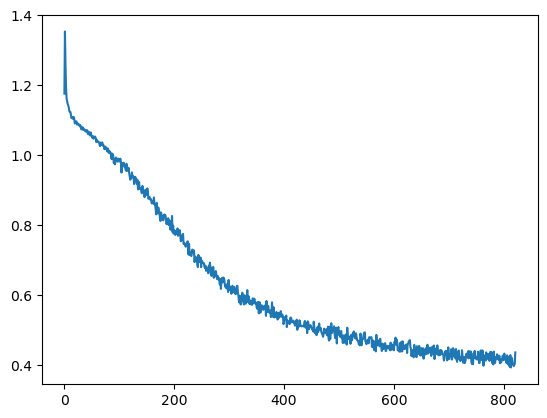

In [415]:
plt.plot(trainer.get_loss_history()[:])


In [416]:

unmixed = trainer.predict(observables)

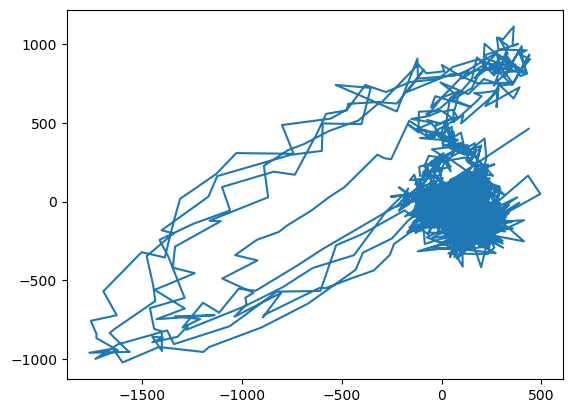

In [417]:
plt.plot(unmixed[:,0,1],unmixed[:,0,0])

ValueError: x and y must have same first dimension, but have shapes (2800,) and (1400,)

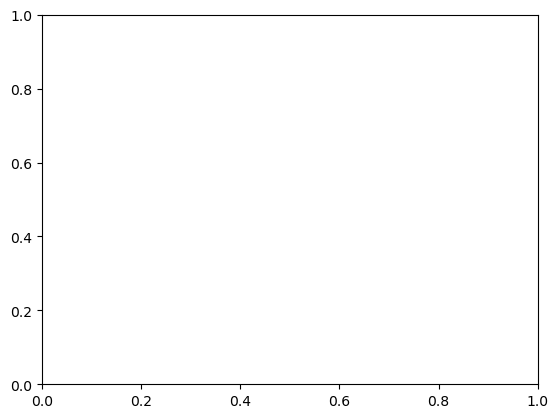

In [402]:
plt.plot((observables @ ppca.components_)[:,999],X[:,999])

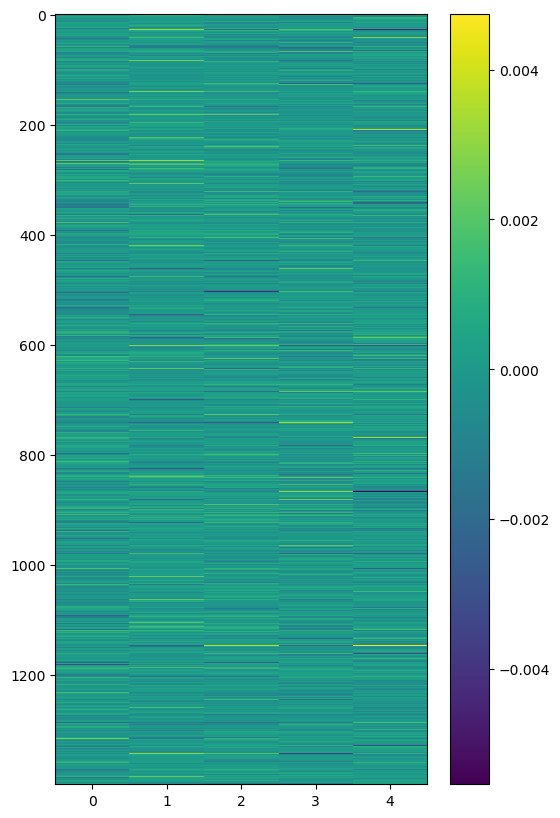

In [418]:

plt.figure(figsize=(6,10))
plt.imshow(np.linalg.pinv(trainer.model.get_weights()[:,2].T),aspect="auto",interpolation="nearest")
plt.colorbar()

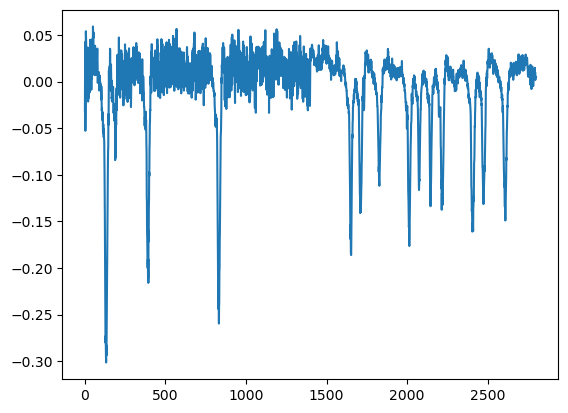

In [448]:

plt.plot(unmixed[:,19,0]/10000)

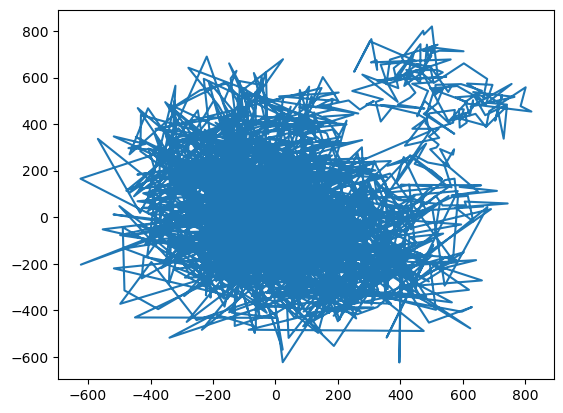

In [405]:
plt.plot(unmixed[:-50,2,0], unmixed[50:,2,0])

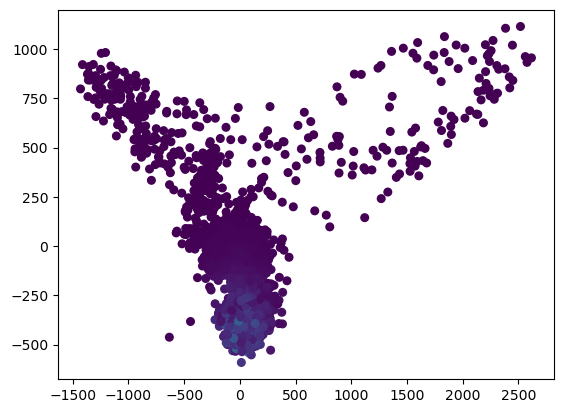

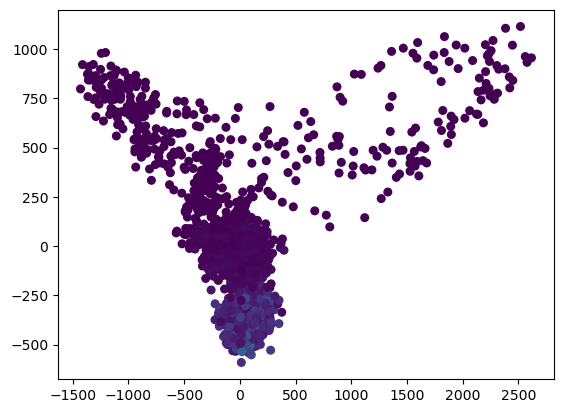

In [420]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(unmixed[:,0][[210]],unmixed[:,0])[0]
weights = np.exp(-(5*dist/dist.mean()))

x_pca = PCA(2).fit_transform(unmixed[:,0,:])
plt.scatter(x_pca[:-20,0],x_pca[:-20,1],c=weights[:-20],s=30)
plt.show()

x_pca = PCA(2).fit_transform(unmixed[:,0,:])
plt.scatter(x_pca[20:,0],x_pca[20:,1],c=weights[:-20],s=30)

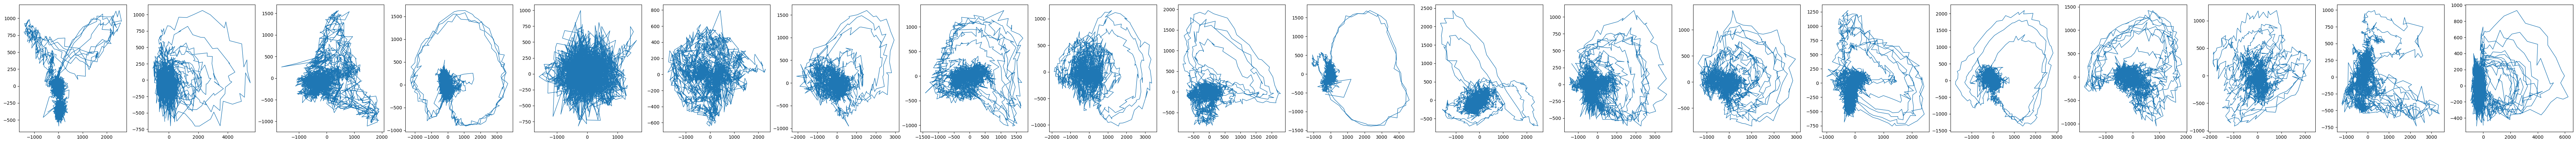

In [421]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=1)

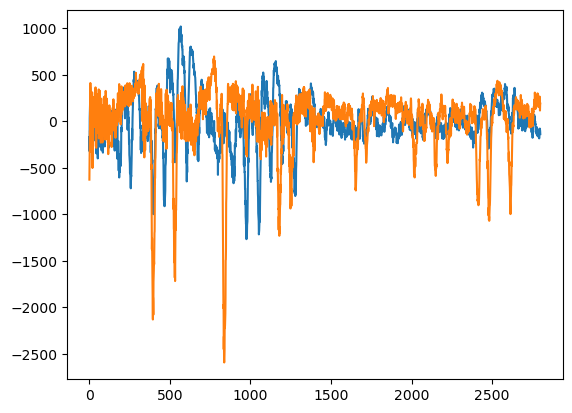

In [422]:
plt.plot(unmixed[:,17][:,1])
plt.plot(unmixed[:,1][:,1])

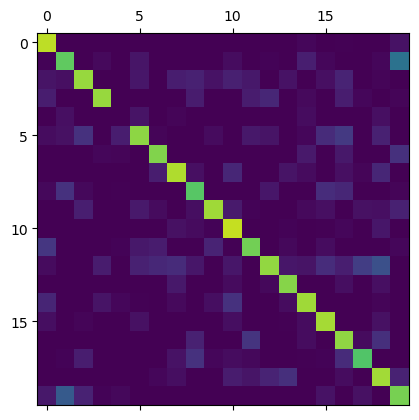

In [423]:
ccm_matrix_unmixed = CCM.PairwiseCCM().compute(np.transpose(unmixed,axes=(1,0,2)),np.transpose(unmixed,axes=(1,0,2)),1500,400,60,60,method="simplex",nbrs_num=15,).mean(axis=0)
plt.matshow(ccm_matrix_unmixed,vmin=0,vmax=1)

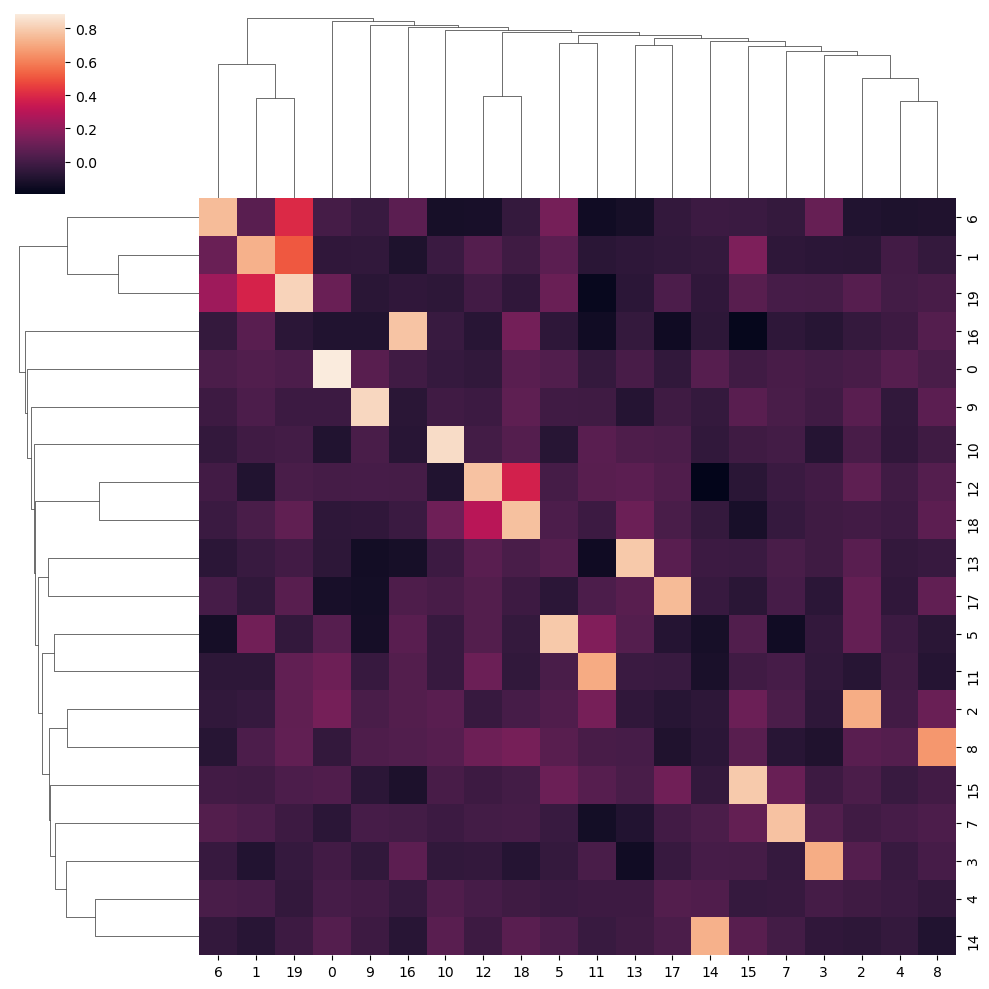

In [410]:
import seaborn as sns
sns.clustermap(ccm_matrix_unmixed)

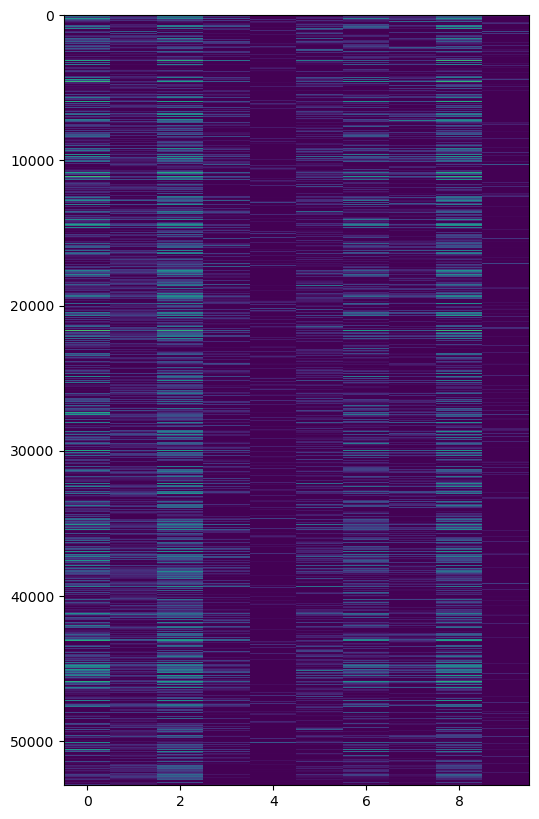

In [449]:
plt.figure(figsize=(6,10))
unmixed_xmap_X = np.mean([CCM.PairwiseCCM().compute(np.transpose(unmixed[:,10:],axes=(1,0,2)),X.T[:,:,None],1200,600,60,0,method="simplex",nbrs_num=15,).mean(axis=0) for exp in range(5)] ,axis=0)
plt.imshow(unmixed_xmap_X,vmin=0,vmax=1,aspect="auto",interpolation="nearest")

/home/iaroslav/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/iaroslav/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


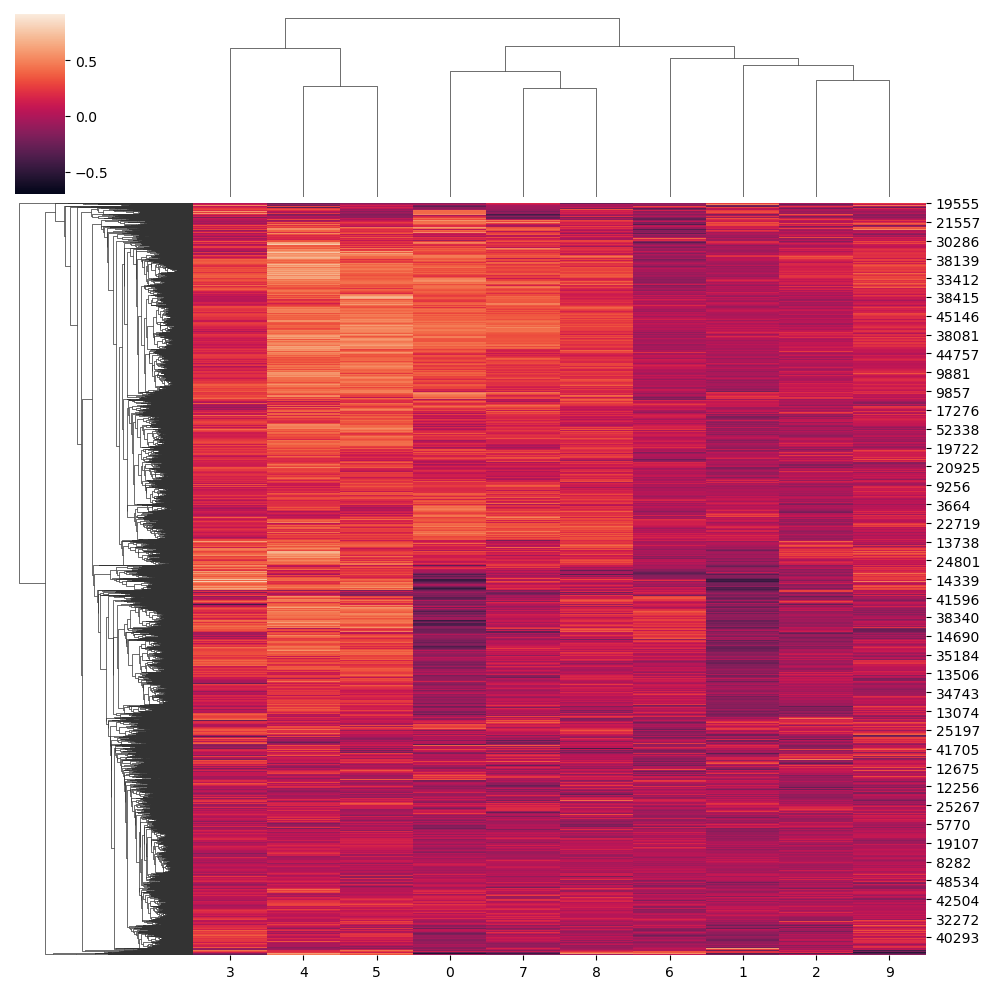

In [149]:

sns.clustermap(unmixed_xmap_X)

In [450]:
np.argsort(unmixed_xmap_X[:,-1])[::-1][:20]

array([ 6038,  3621, 22588, 51150, 15424,   289, 12241, 32435,  9208,
       46892, 27443, 21505,  3615,  6477, 41789, 13065, 16538, 29569,
       25823, 37311])

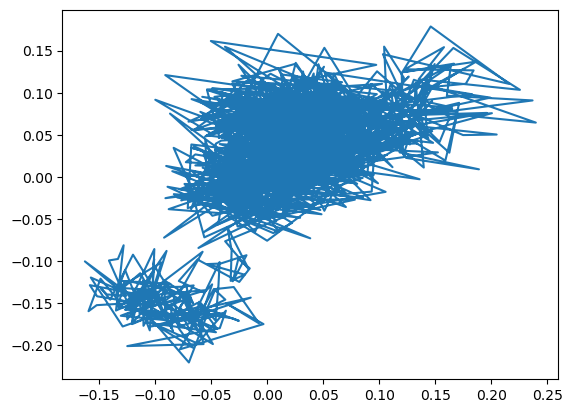

In [452]:

plt.plot(X[:,6038],X[:,3621])

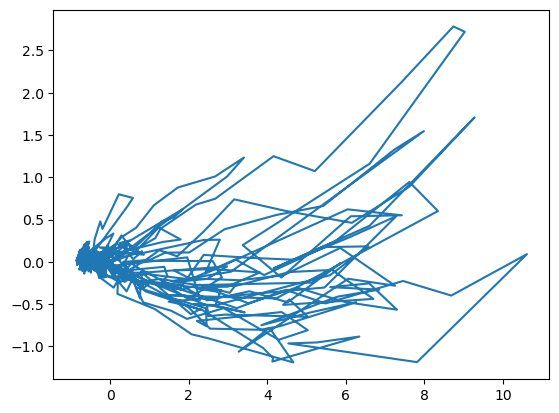

In [306]:
plt.plot(*PCA(2).fit_transform(X[:,np.argsort(unmixed_xmap_X[:,1])[::-1][:20]]).T)

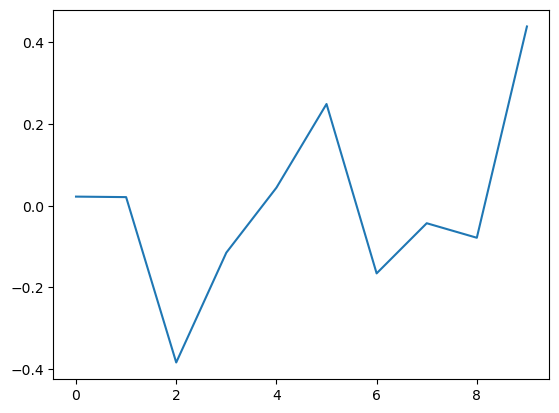

In [453]:
plt.plot(unmixed_xmap_X[6038])

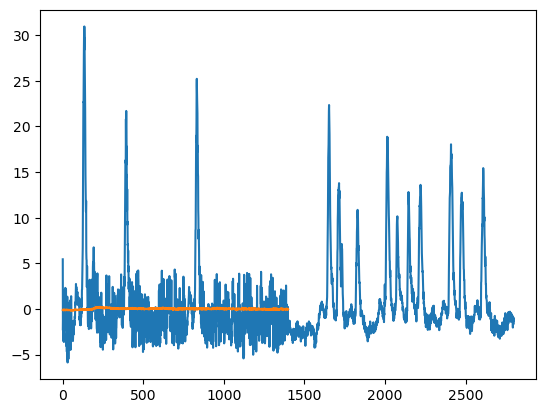

In [455]:
plt.plot(unmixed[:,19][:,2]/100)
plt.plot(X[:,6038])

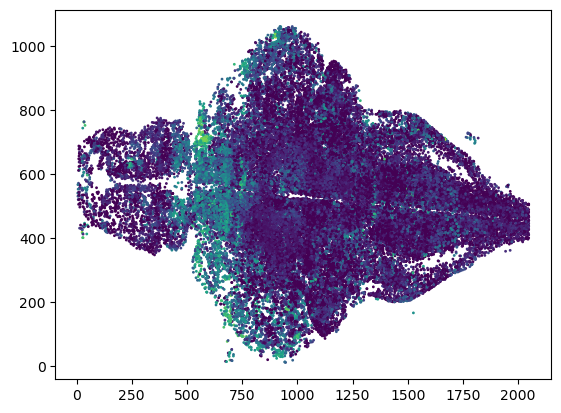

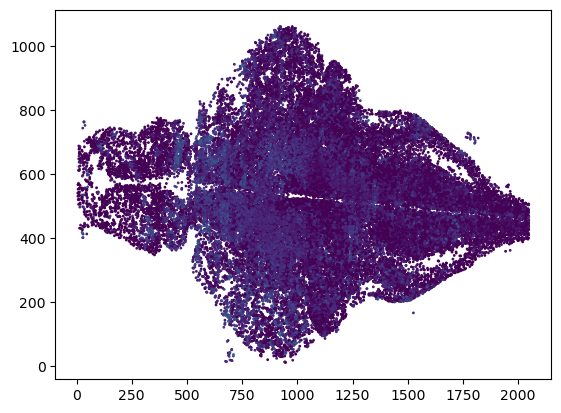

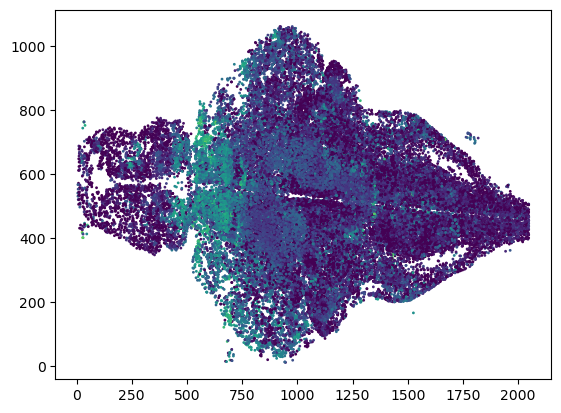

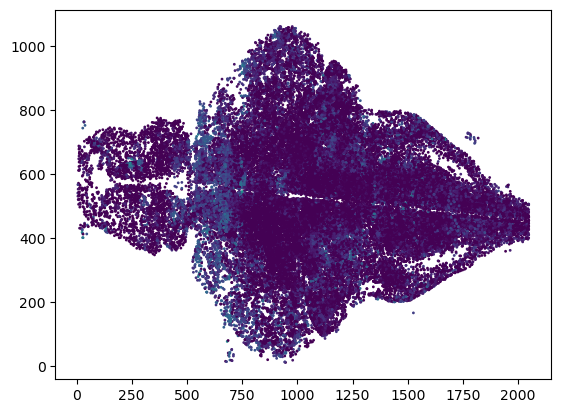

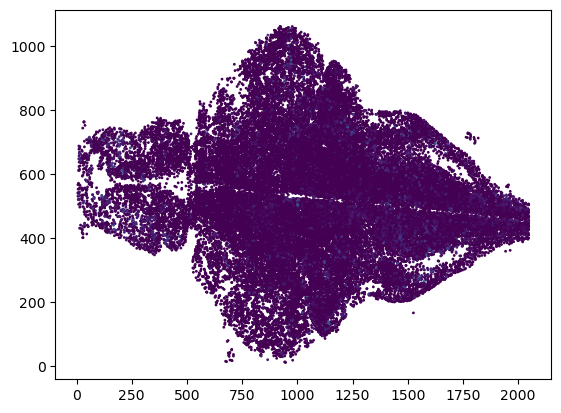

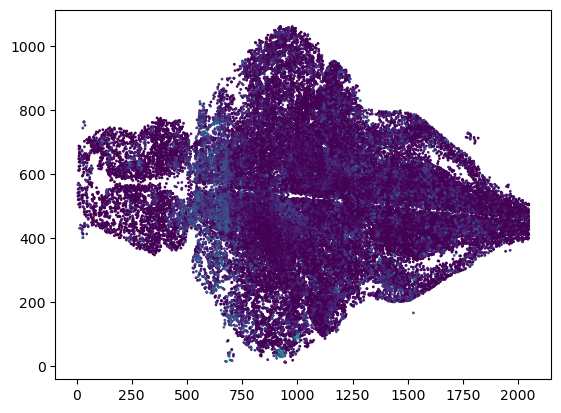

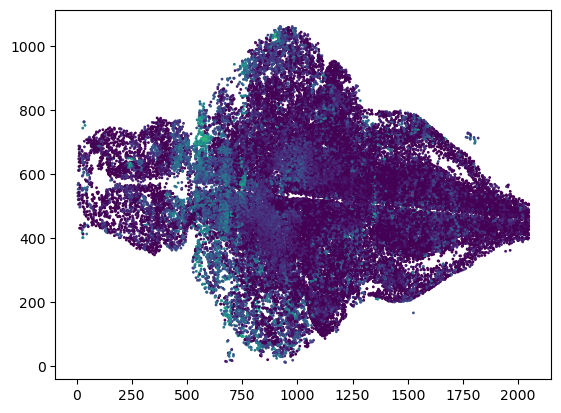

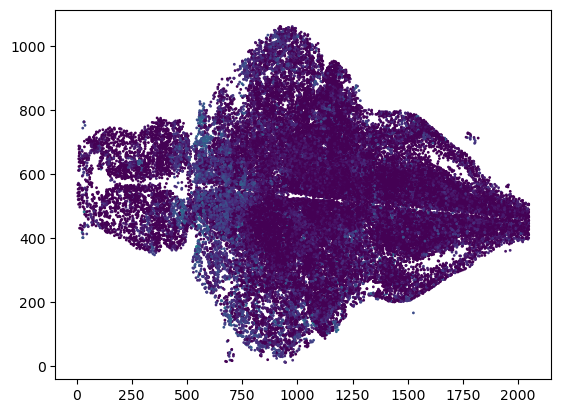

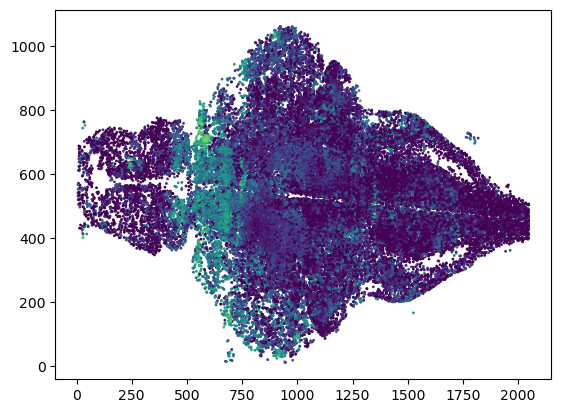

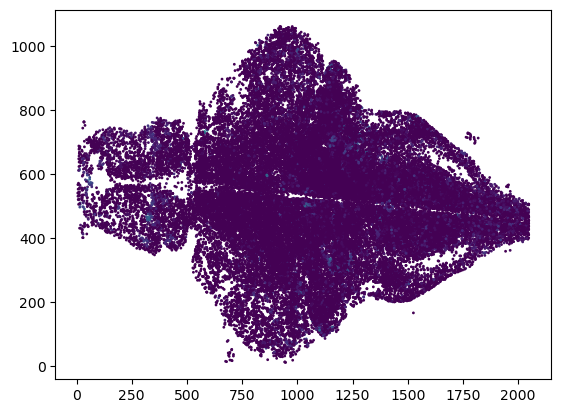

In [456]:
for u in unmixed_xmap_X.T:
    plt.scatter(pos[:,0],pos[:,1],s=1,c=u,vmax=1,vmin=0)
    plt.show()

In [138]:
CCM.PairwiseCCM().compute(observables[:,unmixed_xmap_X[:,0] > 0.7][None],np.transpose(unmixed,axes=(1,0,2)),15000,300,60,0,method="simplex",nbrs_num=15,).mean(axis=0)


IndexError: boolean index did not match indexed array along dimension 1; dimension is 1600 but corresponding boolean dimension is 53052

In [44]:
CCM.PairwiseCCM().compute(observables[:,unmixed_xmap_X[:,1] > 0.5][None],np.transpose(unmixed,axes=(1,0,2)),15000,300,60,0,method="simplex",nbrs_num=15,).mean(axis=0)


IndexError: index 1 is out of bounds for axis 1 with size 1

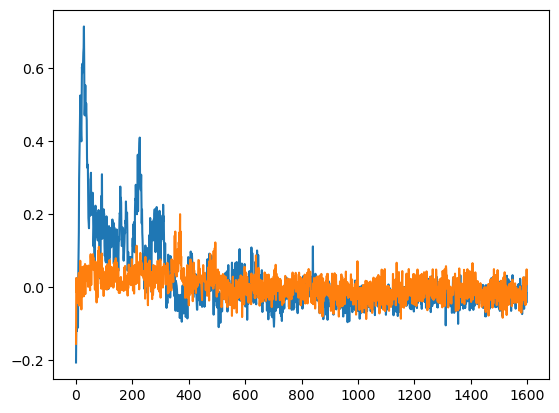

In [139]:

plt.plot(X[:,0])
plt.plot(X[:,34])

In [108]:
import plotly.express as px
x_pca = PCA(3).fit_transform(unmixed[:,0,:])
fig = px.line_3d(x=x_pca[:,0], y=x_pca[:,1],z=x_pca[:,2],height=700)

fig.show()

In [229]:
fig = px.line_3d(x=unmixed[:,1,0], y=unmixed[:,1,1],z=unmixed[:,1,2],height=700)

fig.show()

In [509]:
vars = []
for j in range(10):
    trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=3, n_components=3, subtract_corr=True, device="cuda")
    trainer.fit(observables, sample_len=80, library_len=800, 
            exclusion_rad=90, theta=4, tp=90, 
            epochs=300, num_batches=32, optimizer="Adagrad", learning_rate=0.02, tp_policy="range")

    unmixed = trainer.predict(observables)
    vars += [np.transpose(unmixed,(1,0,2))]
vars = np.concatenate(vars)
plt.matshow(CCM.PairwiseCCM().compute(vars,vars,1500,400,60,30,90,False).mean(axis=0),vmin=0,vmax=1)

Epoch 1/300, Loss: 1.2159
Epoch 2/300, Loss: 1.4649
Epoch 3/300, Loss: 1.3613
Epoch 4/300, Loss: 1.3013
Epoch 5/300, Loss: 1.2649
Epoch 6/300, Loss: 1.1351
Epoch 7/300, Loss: 1.1806
Epoch 8/300, Loss: 1.0274
Epoch 9/300, Loss: 1.0938
Epoch 10/300, Loss: 0.9522
Epoch 11/300, Loss: 0.9704
Epoch 12/300, Loss: 0.9978
Epoch 13/300, Loss: 0.9149
Epoch 14/300, Loss: 0.9327
Epoch 15/300, Loss: 0.8954
Epoch 16/300, Loss: 0.9002


KeyboardInterrupt: 

In [54]:
[utils.calculate_correlation_dimension(unmixed[np.random.randint(0,unmixed.shape[0],1000),i],device="cuda") for i in range(unmixed.shape[1])]

[3.161627769470215,
 3.035858154296875,
 3.163102865219116,
 2.910153865814209,
 3.044713020324707,
 3.022183656692505,
 3.0095221996307373,
 2.8416285514831543,
 2.9751992225646973,
 2.8640193939208984,
 2.927274703979492,
 3.086731433868408,
 3.027596950531006,
 2.5791797637939453,
 3.1672067642211914,
 3.025742292404175,
 2.228558301925659,
 2.5037970542907715,
 2.792874336242676,
 2.8774242401123047]

In [53]:
[utils.calculate_rank_for_variance(unmixed[np.random.randint(0,unmixed.shape[0],5000),i],0.95) for i in range(unmixed.shape[1])]


[4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5, 4, 5]